In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tryig to set the target variable as the fatal or non fatal accindents in France metropolitan area
#Step 2/ Pre-processing and feature engineering : Deadline Friday, 14th of July
#Following the observations made in the previous step, you will have to clean your dataset and perform the pre-processing steps.
#If necessary, you will have to transform and/or add features and enrich your dataset.
#The objective at the end of this step is to have a dataset ready to perform in-depth analysis and/or modeling using Machine (and Deep) Learning.

In [6]:
df = pd.read_csv("./data/230907_basic_table_for_analysis_cleaned.csv", index_col=0, low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509596 entries, 201900000001 to 201800057783
Data columns (total 46 columns):
 #   Column        Dtype  
---  ------        -----  
 0   num_veh       object 
 1   place         float64
 2   catu          int64  
 3   grav          int64  
 4   sexe          int64  
 5   an_nais       float64
 6   trajet        float64
 7   locp          float64
 8   actp          object 
 9   etatp         float64
 10  an            int64  
 11  mois          int64  
 12  jour          int64  
 13  hrmn          object 
 14  lum           int64  
 15  agg           int64  
 16  int           int64  
 17  atm           float64
 18  col           float64
 19  adr           object 
 20  lat           float64
 21  long          float64
 22  dep           int64  
 23  metropolitan  float64
 24  catr          float64
 25  circ          float64
 26  nbv           float64
 27  vosp          float64
 28  prof          float64
 29  plan          float64
 30  su

In [7]:
df[df['metropolitan'] == 1]


,num_veh,place,catu,grav,sexe,an_nais,trajet,locp,actp,etatp,...,obs,obsm,choc,manv,date,is_holiday,holiday,secu_used,secu_avail,fatal
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,B01,2.0,2,4,2,2002.0,0.0,-1.0,-1,-1.0,...,0.0,2.0,5.0,23.0,2019-11-30,False,NaN,3,1,0
201900000001,B01,1.0,1,4,2,1993.0,5.0,-1.0,-1,-1.0,...,0.0,2.0,5.0,23.0,2019-11-30,False,NaN,3,1,0
201900000001,A01,1.0,1,1,1,1959.0,0.0,-1.0,-1,-1.0,...,1.0,0.0,3.0,11.0,2019-11-30,False,NaN,3,1,0
201900000002,A01,1.0,1,4,2,1994.0,0.0,-1.0,-1,-1.0,...,4.0,0.0,1.0,0.0,2019-11-30,False,NaN,3,1,0
201900000003,A01,1.0,1,1,1,1996.0,0.0,-1.0,0,-1.0,...,0.0,2.0,1.0,2.0,2019-11-28,False,NaN,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201800055764,B01,1.0,1,1,1,1988.0,5.0,-1.0,-1,-1.0,...,0.0,2.0,6.0,2.0,2018-12-28,False,NaN,1,1,0
201800055765,A01,1.0,1,4,1,1989.0,1.0,-1.0,-1,-1.0,...,0.0,2.0,3.0,11.0,2018-12-29,False,NaN,1,1,0
201800055765,B01,1.0,1,1,1,1998.0,5.0,-1.0,-1,-1.0,...,0.0,2.0,7.0,1.0,2018-12-29,False,NaN,1,1,0


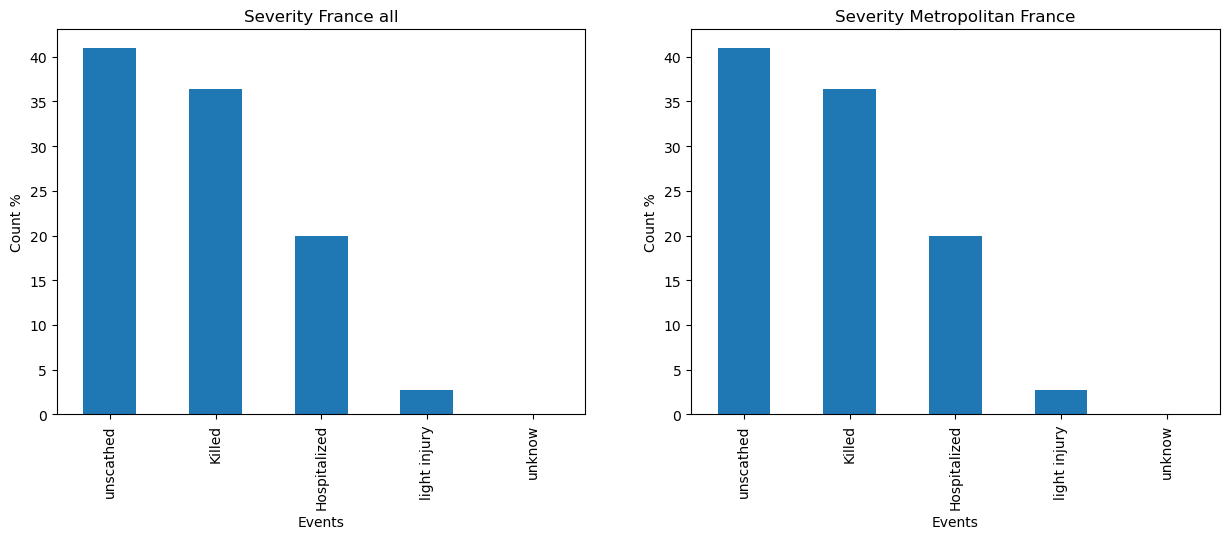

In [8]:
#exploring a possible target variable
#severity
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France all')
# Display the plot
#plt.show()



event_counts_M = df['grav'].value_counts()
event_percentages_M = (event_counts_M / event_counts_M.sum()) * 100
plt.subplot(1,2,2)
event_percentages.plot.bar()
#labels = ['unscathed','Killed','Hospitalized','light injury']
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages_M)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity Metropolitan France')
# Display the plot
plt.show()#

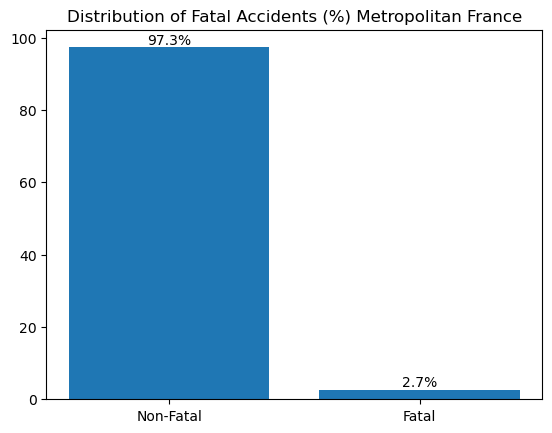

In [9]:
# explorig the new variable 
percentage_distribution = df['fatal'].value_counts(normalize=True) * 100

# Create a bar plot
plt.bar(percentage_distribution.index, percentage_distribution.values)

# Set the x-axis tick labels
plt.xticks(percentage_distribution.index)
plt.xticks(percentage_distribution.index, ['Non-Fatal', 'Fatal'])
plt.title('Distribution of Fatal Accidents (%) Metropolitan France')
# Show labels on top of bars
for i, v in enumerate(percentage_distribution.values):
    plt.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

plt.show()

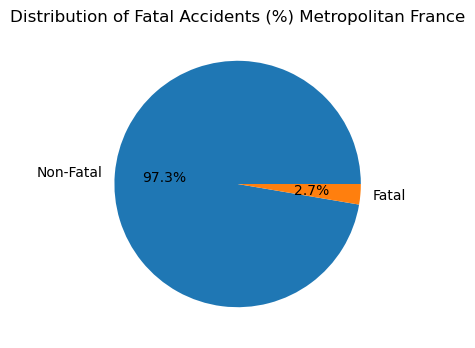

In [10]:

# Create the pie chart
plt.figure(figsize=(4, 4))


mylabels = ['Non-Fatal', 'Fatal']
plt.title('Distribution of Fatal Accidents (%) Metropolitan France')
pie_chart, texts, autotexts = plt.pie(percentage_distribution, labels=mylabels, autopct='%1.1f%%')

# Adjust the label positions for actual numbers
for text, autotext in zip(texts, autotexts):
    text.set(size=10, )
    autotext.set(size=10)

plt.show()

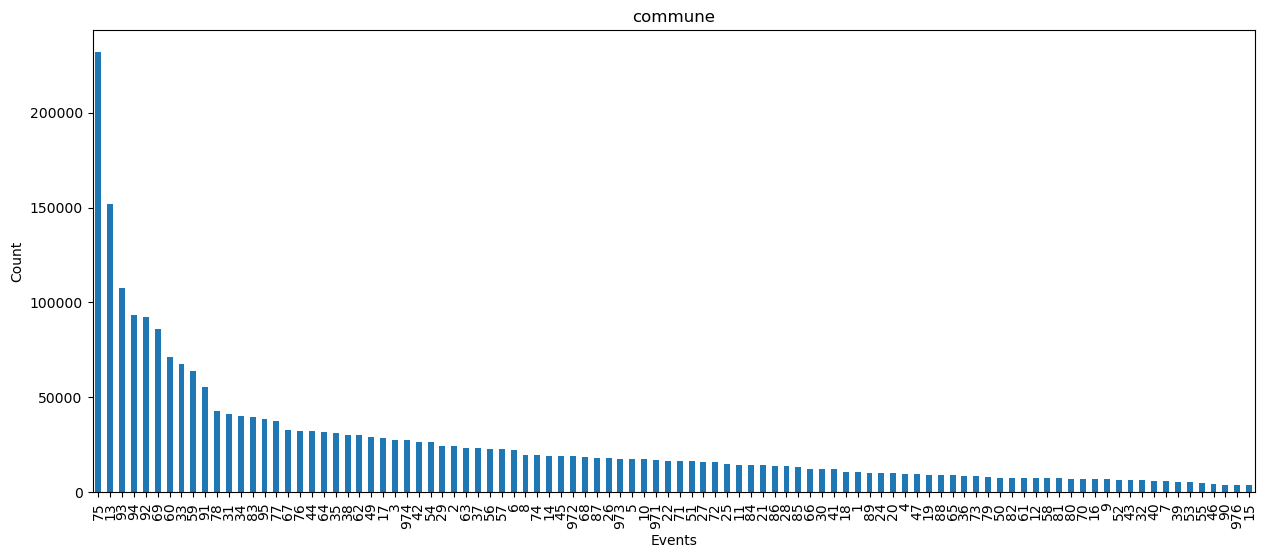

In [11]:
plt.figure(figsize=(15,6))
event_counts = df['dep'].value_counts()
event_counts_filtered = event_counts[event_counts > 3000]

event_counts_filtered.plot.bar()

plt.xticks(rotation=90)
plt.xlabel('Events')
plt.ylabel('Count')
plt.title('commune')
# Display the plot
plt.show()

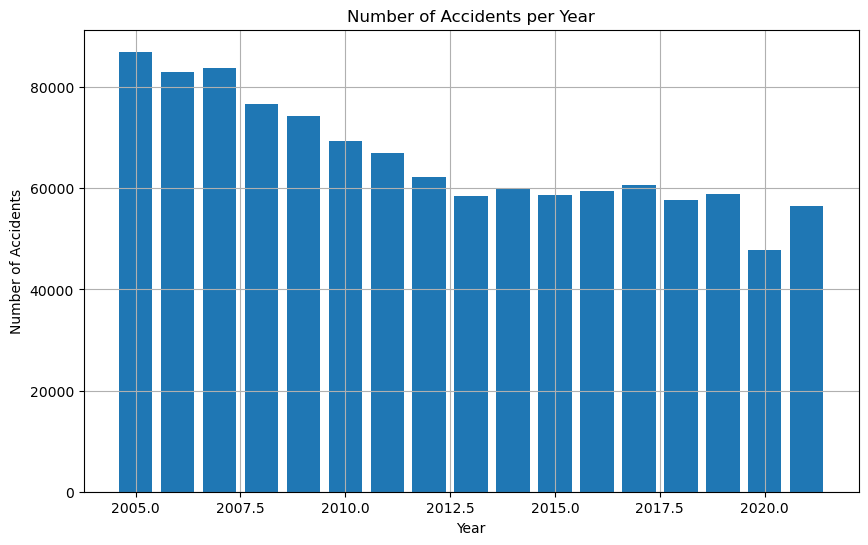

In [12]:
# We need to aggregate the index first
accidents_per_year = pd.DataFrame(df['an'].groupby(df.index).value_counts()).index.get_level_values(1).value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.grid(True)
plt.show()

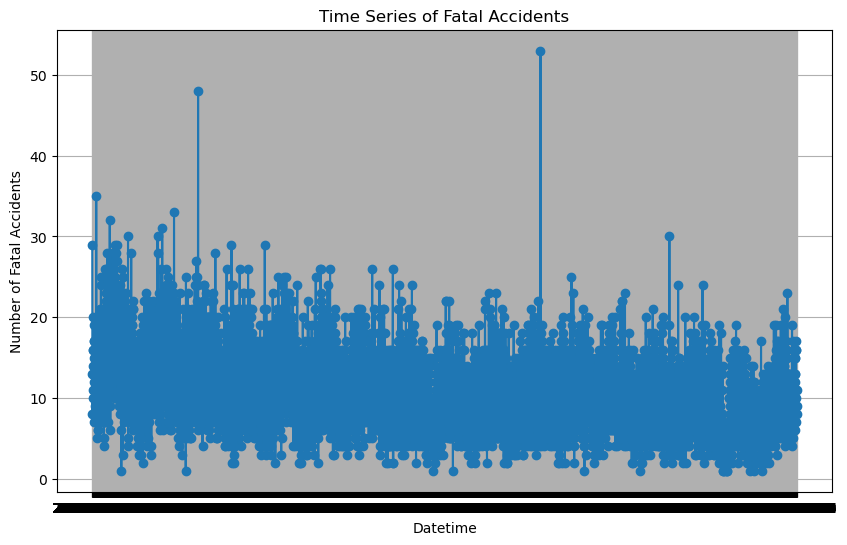

In [14]:
#time series of fatal accidents

fatal_counts = df[df['fatal'] == 1]['date'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents')
plt.grid(True)
plt.show()


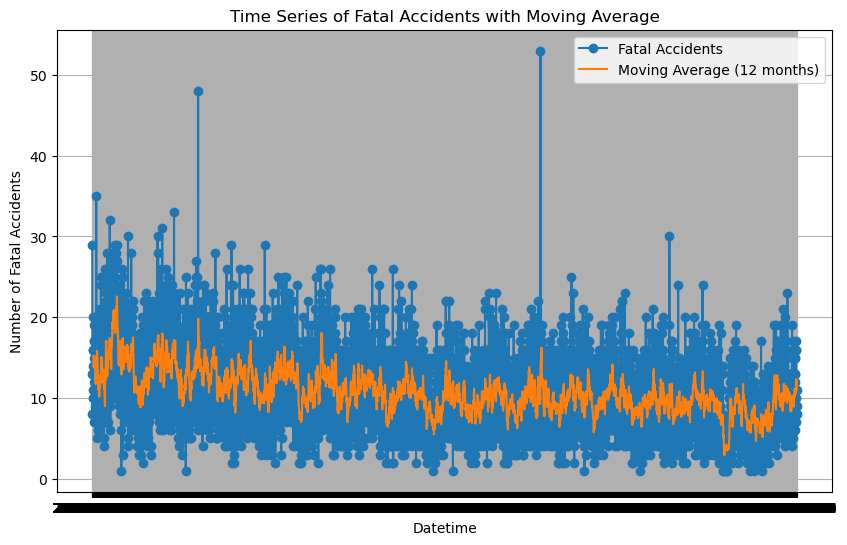

In [15]:
#Filter the DataFrame for fatal accidents
fatal_counts =df[df['fatal'] == 1]['date'].value_counts().sort_index()

# Calculate the moving average with a window size =  12 months
moving_average = fatal_counts.rolling(window=12).mean()

# Plot the time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o', label='Fatal Accidents')
plt.plot(moving_average.index, moving_average.values, label='Moving Average (12 months)')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents with Moving Average')
plt.grid(True)
plt.legend()
plt.show()

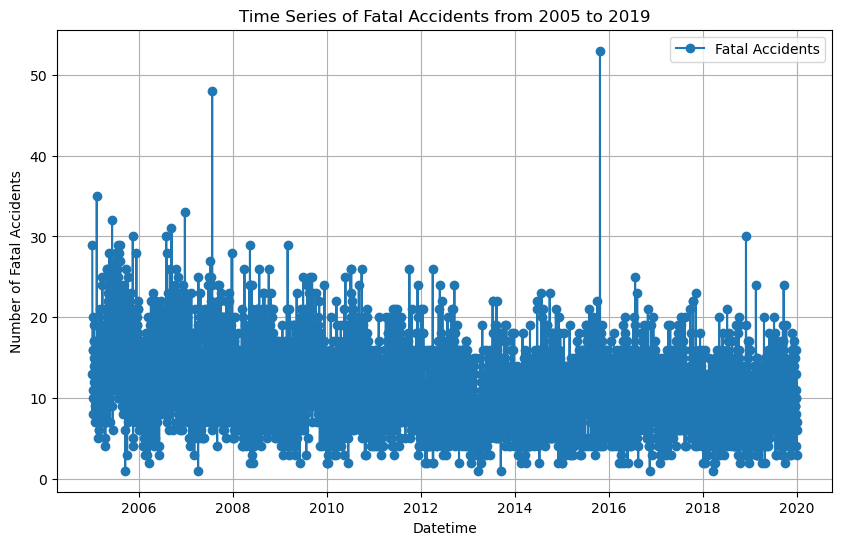

In [16]:
# Assuming 'fatal_counts' already contains the data
# Convert the index of 'fatal_counts' to a datetime format
fatal_counts.index = pd.to_datetime(fatal_counts.index)

# Filter the data for the years 2005 to 2019
filtered_fatal_counts = fatal_counts.loc['2005-01-01':'2019-12-31']

# Now you can plot the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_fatal_counts.index, filtered_fatal_counts.values, marker='o', label='Fatal Accidents')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents from 2005 to 2019')
plt.grid(True)
plt.legend()
plt.show()




In [17]:
filtered_fatal_counts

2005-01-01    29
2005-01-02    13
2005-01-03     8
2005-01-04    16
2005-01-05    13
              ..
2019-12-27     6
2019-12-28    16
2019-12-29     3
2019-12-30     6
2019-12-31     7
Name: date, Length: 5477, dtype: int64

In [18]:
print(filtered_fatal_counts.index)

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=5477, freq=None)


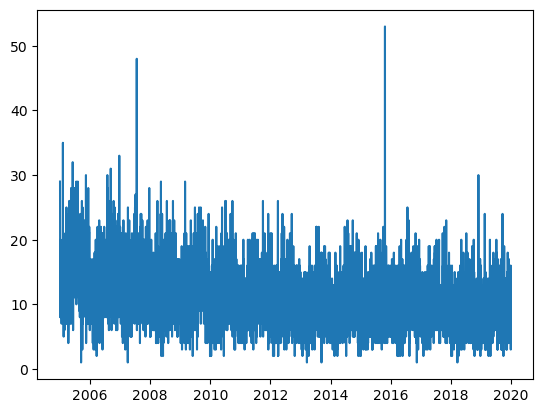

In [21]:
plt.plot(filtered_fatal_counts)
plt.show()

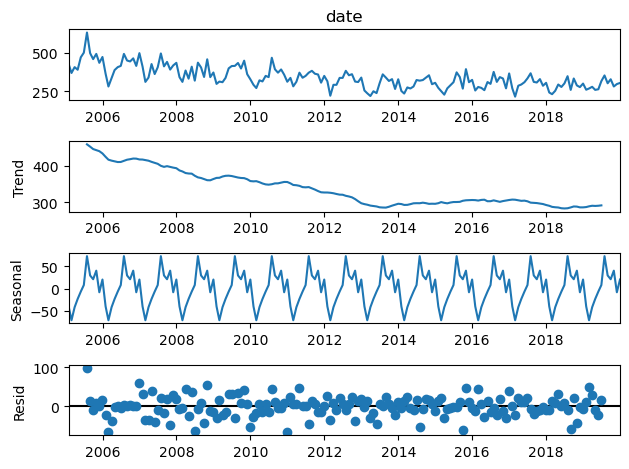

In [22]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'filtered_fatal_counts' contains the daily data for the years 2005 to 2019
# Convert the index to a datetime index if it's not already
#filtered_fatal_counts.index = pd.to_datetime(filtered_fatal_counts.index)

# Resample the daily data to annual data (summing counts for each year)
#annual_fatal_counts = filtered_fatal_counts.resample('A').sum()

# Perform seasonal decomposition on annual data
#res = seasonal_decompose(annual_fatal_counts, model='multiplicative')  # You can choose 'additive' or 'multiplicative' based on your data

# Plot the decomposition components
#res.plot()
#plt.show()


# Assuming 'filtered_fatal_counts' contains the daily data for the years 2005 to 2019
# Convert the index to a datetime index if it's not already
filtered_fatal_counts.index = pd.to_datetime(filtered_fatal_counts.index)

# Resample the daily data to monthly data (summing counts for each month)
monthly_fatal_counts = filtered_fatal_counts.resample('M').sum()

# Perform seasonal decomposition on monthly data
res = seasonal_decompose(monthly_fatal_counts, model='additive')  # You can choose 'additive' or 'multiplicative' based on your data

# Plot the decomposition components
res.plot()
plt.show()





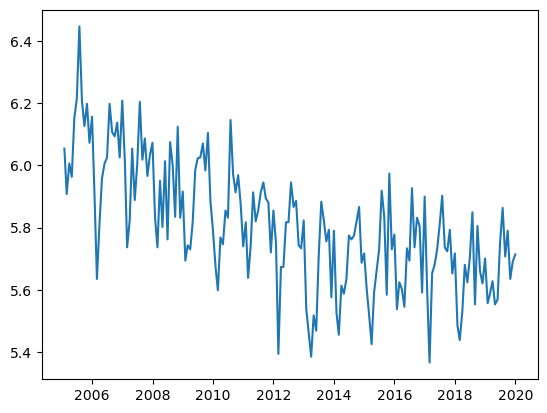

In [23]:
import numpy as np
fatallog = np.log(monthly_fatal_counts)
plt.plot(fatallog)
plt.show()

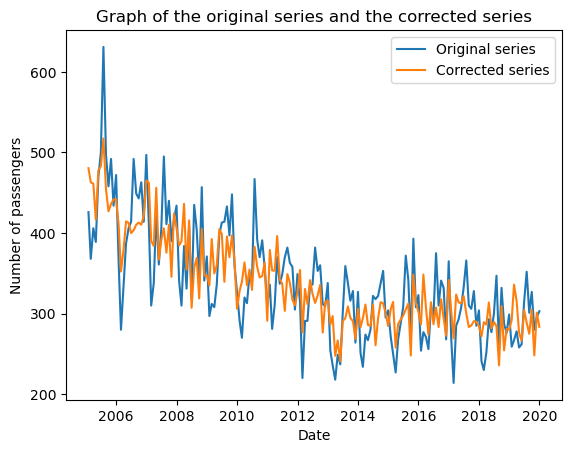

In [24]:
# We apply the seasonal_decompose function to airpasslog

# Here we use the transform in log we are therefore in an additive model

mult = seasonal_decompose(fatallog)

# Seasonal coefficients are subtracted from the airpasslog series

cvs=fatallog- mult.seasonal

# We go to the exponential to find the original series

x_cvs=np.exp(cvs)


# We display the series

plt.plot(monthly_fatal_counts, label='Original series')

plt.plot(x_cvs, label='Corrected series') 

plt.title('Graph of the original series and the corrected series')

plt.xlabel('Date')

plt.ylabel('Number of passengers')

plt.legend()


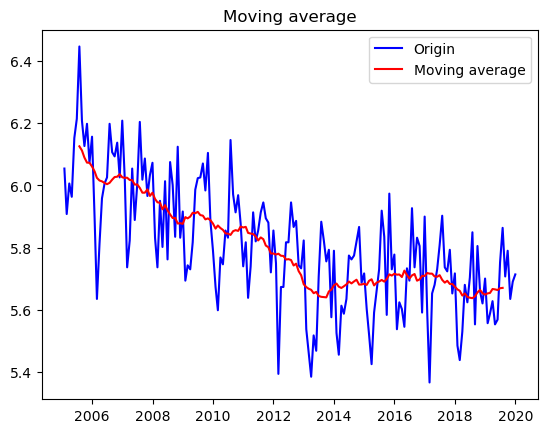

In [26]:
# Insert your code here
fatal_ma =fatallog.rolling(window =12, center = True).mean()
#Series display

plt.plot(fatallog, color = 'blue', label = 'Origin')
plt.plot(fatal_ma, color = 'red', label = 'Moving average')
plt.legend()
plt.title('Moving average')
plt.show()


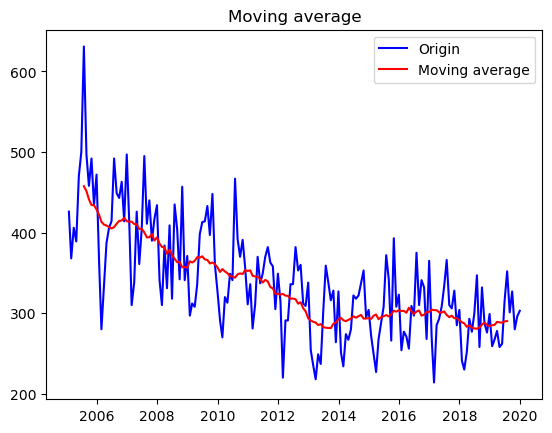

In [27]:
# If we want to find the original series, we just have to go exponential.
# (d) Execute the next cell to switch to exponential and display the series.


plt.plot(np.exp(fatallog), color = 'blue', label = 'Origin')

plt.plot(np.exp(fatal_ma), color = 'red', label = 'Moving average')

plt.legend()

plt.title('Moving average')

plt.show()

In [38]:
fatallog_without_ma= fatallog - fatal_ma



fatallog_without_ma.head(10)

2005-01-31         NaN
2005-02-28         NaN
2005-03-31         NaN
2005-04-30         NaN
2005-05-31         NaN
2005-06-30         NaN
2005-07-31    0.321384
2005-08-31    0.096004
2005-09-30    0.037058
2005-10-31    0.124935
Freq: M, Name: date, dtype: float64

In [39]:
fatallog_without_ma = fatallog_without_ma.dropna()

# Serie display

fatallog_without_ma.head(10)


2005-07-31    0.321384
2005-08-31    0.096004
2005-09-30    0.037058
2005-10-31    0.124935
2005-11-30   -0.000069
2005-12-31    0.096063
2006-01-31   -0.150784
2006-02-28   -0.389662
2006-03-31   -0.204847
2006-04-30   -0.054788
Freq: M, Name: date, dtype: float64

In [40]:
df_ts = fatallog_without_ma.to_frame()

df_ts['month'] = (df_ts.index).month

df_ts.head(10)

,date,month
2005-07-31,0.321384,7
2005-08-31,0.096004,8
2005-09-30,0.037058,9
2005-10-31,0.124935,10
2005-11-30,-0.000069,11
2005-12-31,0.096063,12
2006-01-31,-0.150784,1
2006-02-28,-0.389662,2
2006-03-31,-0.204847,3
2006-04-30,-0.054788,4


In [41]:
# Average per month using the groupby 

seasonnality = df_ts.groupby('month').mean()

# Centering the coefficients

seasonnality = seasonnality - seasonnality.mean()

In [42]:
#Vector creation

seasonal_vector = np.zeros(180)

j=0
for i in range(12):
    seasonal_vector[j:j+12] = seasonnality.iloc[:,0]
    j=j+12
    
    
# Subtract the seasonal coefficients
fatallog_cvs = fatallog - seasonal_vector


# We find the original series by switching to the exponential

fatal_cvs = np.exp(fatallog_cvs)


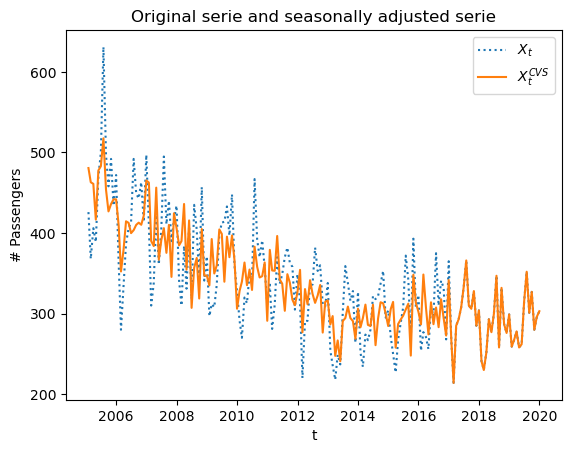

In [43]:
# Insert your code here
plt.plot(monthly_fatal_counts, ':', label = '$X_t$')
plt.plot(fatal_cvs, label = '$X_t^{CVS}$')
plt.title('Original serie and seasonally adjusted serie')
plt.xlabel('t')
plt.ylabel('# Passengers')
plt.legend();